<a href="https://colab.research.google.com/github/Shwethaa-R/Deep-Learning-Activity-5/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Long Short Term Memory



## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Description of Dataset: It is the stock price dataset of Google for five years from 2012 to 2016. There are two CSV files, namely- Google_Stock_Price_Train.csv and Google_Stock_Price_Test.csv. The former dataset contains six columns, of which the column ‘Open’ (which stands for Open Google Stock Prices) is the one to be predicted. The dataset contains 1258 records. The latter also contains the same six columns and 20 records.

In [ ]:
dataset_train = pd.read_csv('/content/drive/My Drive/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
# The model will remember up to 60 previous timesteps to make the predictions 
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building and Training the LSTM Model

## Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the LSTM

In [ ]:
regressor = Sequential()

### LSTM Architecture

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

### Compiling the LSTM

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the LSTM to the Training set

In [ ]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 36s 15ms/step - loss: 0.0752
Epoch 2/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0066
Epoch 4/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0055
Epoch 8/100
38/38 [==============================] - 0s 13ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0041
Epoch 11/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0048
Epoch 12/100
38/38 [==============================] - 0s 12ms/step - loss: 0.0055
Epoch 13/100
38/38 [====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('/content/drive/My Drive/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

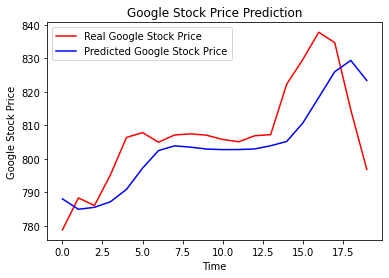

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

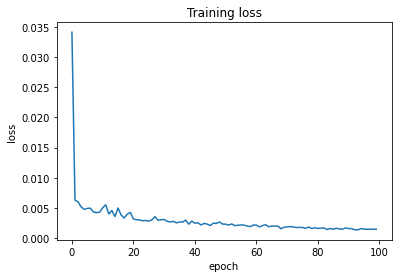

In [ ]:
plt.plot(history.history['loss'])
plt.title('Training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### R2 Score of the Model

In [ ]:
from sklearn.metrics import r2_score
round(r2_score(real_stock_price, predicted_stock_price),2)

0.39